<a href="https://colab.research.google.com/github/sirischuck/ML-HW2/blob/main/ML_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These are the update rules for each of the parameters

$w_2=:w_2-\frac{dL}{dw_2}$

$\frac{dL}{dw_2}=\frac{1}{n}*2*(y_i-\hat{y}_i)*a_{1i}$
\
\
$b_2=:b_2-\frac{dL}{db_2}$

$\frac{dL}{db_2}=\frac{1}{n}*2*(y-\hat{y})$
\
\
$w_1=:w_1-\frac{dL}{dw_1}$

$\frac{dL}{dw_1}=\frac{1}{n}*2*(y-\hat{y})*a_1*(1-a_1)*x$
\
\
$b_1=:b_1-\frac{dL}{db_1}$

$\frac{dL}{db_2}=\frac{1}{n}*2*(y-\hat{y})*a_1*(1-a_1)$



The update rules are different from a binary classification because the loss function and the output layer activation function are both different, so the $frac{dl}{da2}$ term and $frac{da2}{dz2}$ terms of your chain rule change, but the rest stays the same.

In [103]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

In [104]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def dSigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [105]:
#read in the training and test data

#def CSVtoArray(file):
#  temp = list(csv.reader(open(file), delimiter=' ', quotechar='|'))
#  return np.array([[float(x)for x in row] for row in temp])

xTest=np.loadtxt('X_test.csv')
yTest=np.loadtxt('Y_test.csv')
xTrain=np.loadtxt('X_train.csv')
yTrain=np.loadtxt('Y_train.csv')


In [106]:
def train(X,Y,alpha,eCount,nCount):
  n=Y.size

  #randomize initialize parameters
  w1=np.random.rand(nCount,2)
  b1=np.random.rand(nCount,1)
  w2=np.random.rand(1,nCount)
  b2=np.random.rand(1,1)

  #calculate forward pass
  z1 = np.dot(w1,X.T) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = z2

  iniErr=sum(((yTrain-a2)**2).T)/Y.size
  #print('initial error is:', iniErr)

  minErr=iniErr
  minParam=(w1,b1,w2,b2)

  for i in range(eCount):
    
    dLdz2s = 2*(Y.T-a2)
    dLdw2 = np.dot(dLdz2s,a1.T)/n
    dLdb2 = sum(dLdz2s.T)/n

    dLdz1s= (np.dot(w2.T,dLdz2s) * dSigmoid(z1)).T
    dLdw1=np.dot(dLdz1s.T,X)/n
    dLdb1=(sum(dLdz1s)/n).reshape(b1.shape)

    w1 = w1 + alpha*dLdw1
    w2 = w2 + alpha*dLdw2
    b1 = b1 + alpha*dLdb1
    b2 = b2 + alpha*dLdb2

    z1 = np.dot(w1,X.T) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = z2

    currErr=sum(((Y-a2)**2).T)/Y.size

    if currErr<minErr:
      minErr=currErr
      minParam= (w1,b1,w2,b2)

  #print(minErr)
  return minParam

In [107]:

w1f, b1f, w2f, b2f=train(xTrain,yTrain,.1,250,4)

z1 = np.dot(w1f,xTest.T) + b1f
a1 = sigmoid(z1)
z2 = np.dot(w2f,a1) + b2f
a2 = z2

currErr=sum(((yTest-a2)**2).T)/yTest.size
print(currErr)

[240.87097718]


In [108]:
Losses=[]

for i in range(250):
  w1, b1, w2, b2=train(xTrain,yTrain,.1,i,4)
  
  z1 = np.dot(w1,xTest.T) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = z2

  currErr=sum(((yTest-a2)**2).T)/yTest.size
  Losses.append(currErr)


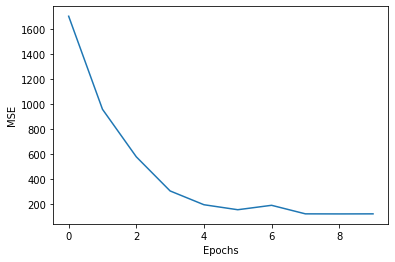

In [168]:

plt.plot(range(len(Losses)),Losses)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [115]:
Losses=[]



for i in np.linspace(.001,1,100):
  w1, b1, w2, b2=train(xTrain,yTrain,i,300,4)
  
  z1 = np.dot(w1,xTest.T) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = z2

  currErr=sum(((yTest-a2)**2).T)/yTest.size
  Losses.append(currErr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


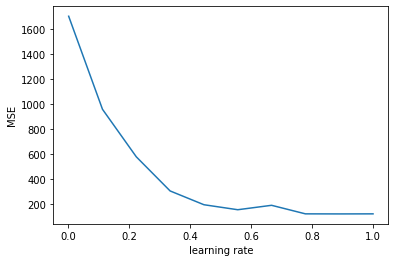

In [169]:

plt.plot(np.linspace(.001,1,len(Losses)),Losses)
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.show()

In [137]:
Losses=[]



for i in range(1,11):
  w1, b1, w2, b2=train(xTrain,yTrain,.1,400,i)
  
  z1 = np.dot(w1,xTest.T) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = z2

  currErr=sum(((yTest-a2)**2).T)/yTest.size
  Losses.append(currErr[0])

The loss with  1  neurons is 1700.5944000534773
The loss with  2  neurons is 957.7850763204525
The loss with  3  neurons is 578.2947218119351
The loss with  4  neurons is 305.85445859020643
The loss with  5  neurons is 195.83303268957695
The loss with  6  neurons is 155.92704228646656
The loss with  7  neurons is 191.2485894239437
The loss with  8  neurons is 123.02196345063398
The loss with  9  neurons is 122.5007482996421
The loss with  10  neurons is 123.01135759003472


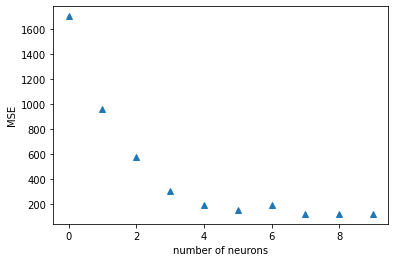

In [170]:

for (loss,i) in zip(Losses,range(1,11)):
  print('The loss with ',i,' neurons is', loss)

plt.plot(range(len(Losses)),Losses,'^')
plt.xlabel('number of neurons')
plt.ylabel('MSE')
plt.show()


In [163]:
def tanh(x):
  return(np.exp(2*x)-1/(np.exp(2*x)+1))

def dtanh(x):
  return(1- tanh(x)**2)

def tanhtrain(X,Y,alpha,eCount,nCount):
  n=Y.size

  #randomize initialize parameters
  w1=np.random.rand(nCount,2)
  b1=np.random.rand(nCount,1)
  w2=np.random.rand(1,nCount)
  b2=np.random.rand(1,1)

  #calculate forward pass
  z1 = np.dot(w1,X.T) + b1
  a1 = tanh(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = z2

  iniErr=sum(((yTrain-a2)**2).T)/Y.size
  print('initial error is:', iniErr)

  minErr=iniErr
  minParam=(w1,b1,w2,b2)

  for i in range(eCount):
    
    dLdz2s = 2*(Y.T-a2)
    dLdw2 = np.dot(dLdz2s,a1.T)/n
    dLdb2 = sum(dLdz2s.T)/n

    dLdz1s= (np.dot(w2.T,dLdz2s) * dtanh(z1)).T
    dLdw1=np.dot(dLdz1s.T,X)/n
    dLdb1=(sum(dLdz1s)/n).reshape(b1.shape)

    w1 = w1 + alpha*dLdw1
    w2 = w2 + alpha*dLdw2
    b1 = b1 + alpha*dLdb1
    b2 = b2 + alpha*dLdb2

    z1 = np.dot(w1,X.T) + b1
    a1 = tanh(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = z2

    currErr=sum(((Y-a2)**2).T)/Y.size

    if currErr<minErr:
      minErr=currErr
      minParam= (w1,b1,w2,b2)

  #print(minErr)
  return minParam



In [171]:
def lin(x):
  return(x)

def dlin(x):
  return(np.ones(x.shape))

def lintrain(X,Y,alpha,eCount,nCount):
  n=Y.size

  #randomize initialize parameters
  w1=np.random.rand(nCount,2)
  b1=np.random.rand(nCount,1)
  w2=np.random.rand(1,nCount)
  b2=np.random.rand(1,1)

  #calculate forward pass
  z1 = np.dot(w1,X.T) + b1
  a1 = lin(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = z2

  iniErr=sum(((yTrain-a2)**2).T)/Y.size
  print('initial error is:', iniErr)

  minErr=iniErr
  minParam=(w1,b1,w2,b2)

  for i in range(eCount):
    
    dLdz2s = 2*(Y.T-a2)
    dLdw2 = np.dot(dLdz2s,a1.T)/n
    dLdb2 = sum(dLdz2s.T)/n

    dLdz1s= (np.dot(w2.T,dLdz2s) * dlin(z1)).T
    dLdw1=np.dot(dLdz1s.T,X)/n
    dLdb1=(sum(dLdz1s)/n).reshape(b1.shape)

    w1 = w1 + alpha*dLdw1
    w2 = w2 + alpha*dLdw2
    b1 = b1 + alpha*dLdb1
    b2 = b2 + alpha*dLdb2

    z1 = np.dot(w1,X.T) + b1
    a1 = lin(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = z2

    currErr=sum(((Y-a2)**2).T)/Y.size

    if currErr<minErr:
      minErr=currErr
      minParam= (w1,b1,w2,b2)

  #print(minErr)
  return minParam

In [174]:
w1,b1,w2,b2=lintrain(xTrain,yTrain,.1,250,5)

z1 = np.dot(w1,xTest.T) + b1
a1 = lin(z1)
z2 = np.dot(w2,a1) + b2
a2 = z2

currErr=sum(((yTest-a2)**2).T)/yTest.size
print('current error is', currErr)

initial error is: [5474.75429264]
current error is [5409.01254145]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in add


In [167]:
w1,b1,w2,b2=tanhtrain(xTrain,yTrain,.01,250,5)

z1 = np.dot(w1,xTest.T) + b1
a1 = tanh(z1)
z2 = np.dot(w2,a1) + b2
a2 = z2

currErr=sum(((yTest-a2)**2).T)/yTest.size
print(currErr)

initial error is: [64210.50269832]
[3351.40939078]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


1. The activation function for the output layer is the identity, or a2=z2, because for a regression task there is no reason to compress the data to form a probability, and the lables range a lot in scale.
2. Only one neuron in the output layer because the label only has one dimension.
3. The MSE after training for 250 epochs is 138 over the test data
4. graph is shown in the code above
5. The Learning rate affects how the model converges. If a learning rate is high it means that the model will take large steps along the gradient, and often overshoot the minimum, and if it is low it will take more iterations to converge.
6. 
a.The Update rule is independant of the number of neurons, because all of the operations work the same no matter how large the vectors are.

b.In General the loss falls off very quickly as the number of neurons starts to grow, but the gains made slow as the neuron count grows higher.

7.

a.Yes the update rule changes, but not by too much.

b.The only difference is that the $\frac{da1}{dz1}$ term in your chain rule changes. 

c.after only a few changes the new equations popped out and did significantly worse than sigmoid. linear activation did about as badly as a randomized sigmoid and tanh only did slightly better.